In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import env_basketball

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch

In [12]:
env = env_basketball.BasketballEnv(config={'n_offensive_players': 1, 'n_defensive_players': 0})
state = env.reset()

for b in env.bodies_players:
    b.velocity = tuple(np.random.randn(2)*0.1*7.62)
    vel = torch.randn(2)
    # vel = vel/vel.norm()*6.7
    vel = vel/vel.norm()*1.0
    b.velocity = tuple(vel.numpy())

states = []
for t in range(20):
    action = env.action_space.sample()
    state, reward, done, info = env.step(env_basketball.Action(env))
    states.append(state)


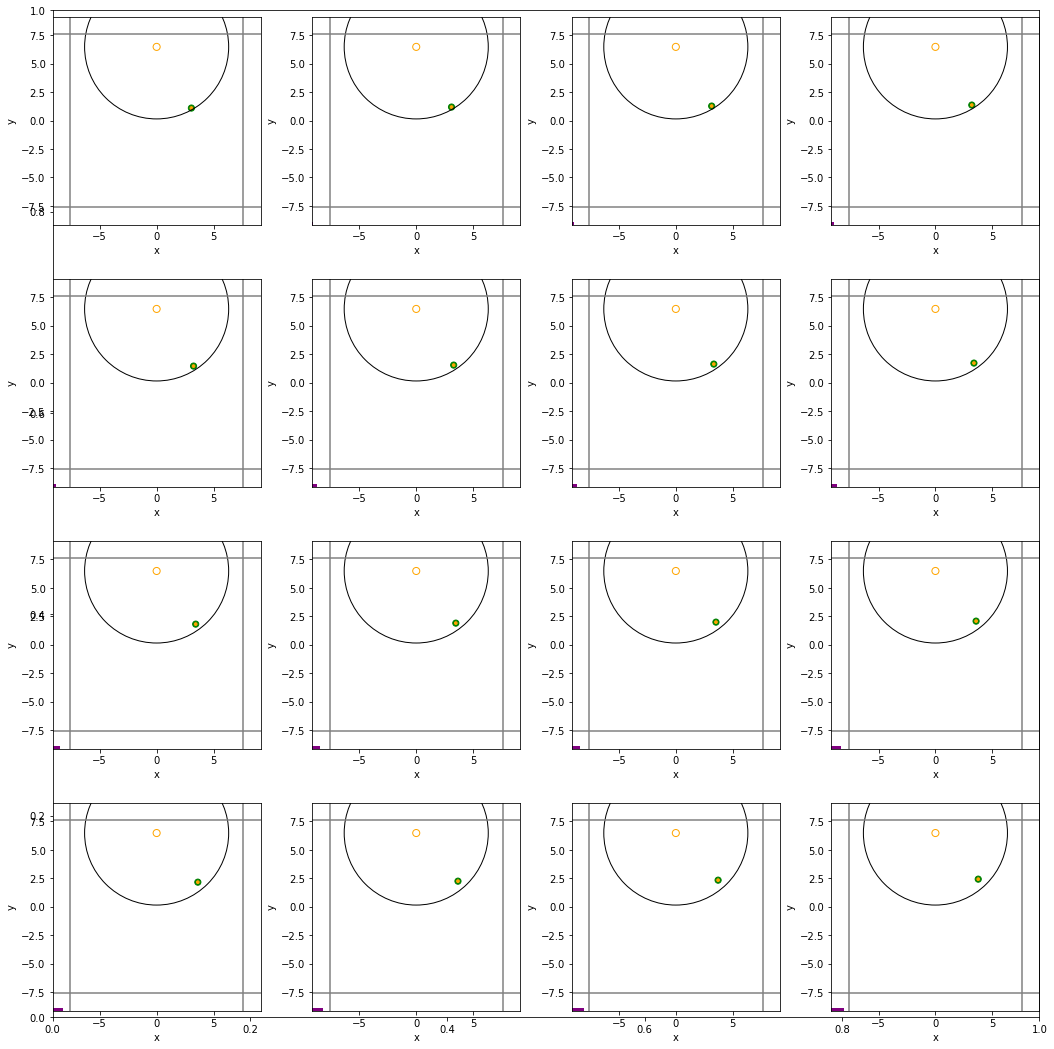

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
fig = env.render_episode(mode='grid', fig=fig, ax=ax, nrows=4, ncols=4)

In [108]:
ani, vid = env.render_episode(mode='vid', tqdm=tqdm)
vid

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

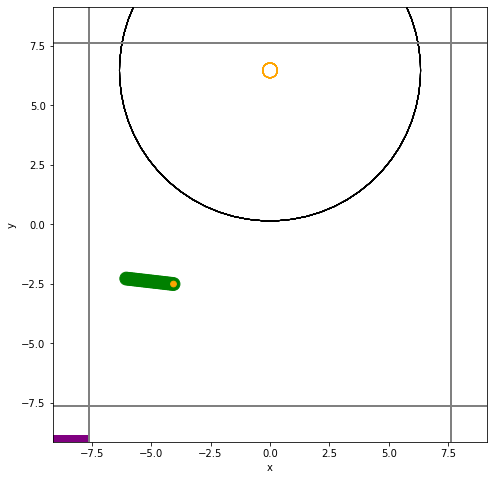

In [109]:
fig = env.render_episode(mode='overlay', tqdm=tqdm)

In [4]:
import pymunk
import pymunk.matplotlib_util

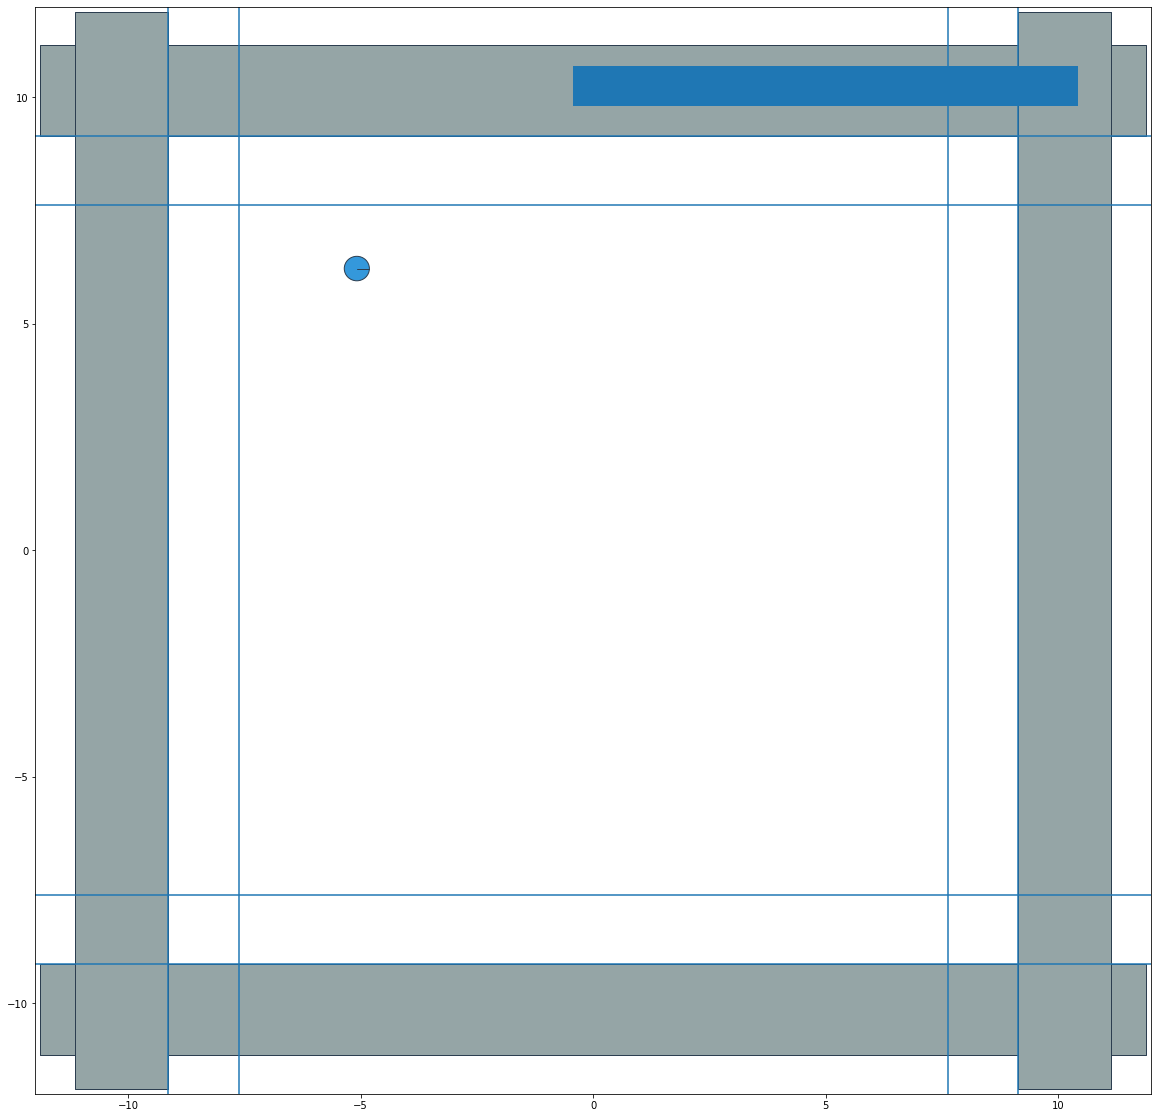

In [60]:
env = env_basketball.BasketballEnv(config={'n_offensive_players': 1, 'n_defensive_players': 0})
state = env.reset()
fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_facecolor("red")
o = pymunk.matplotlib_util.DrawOptions(ax)
env.space.debug_draw(o)

plt.hlines(9.144, -20, 20); plt.hlines(-9.144, -20, 20); plt.vlines(9.144, -20, 20); plt.vlines(-9.144, -20, 20)
plt.hlines(7.62, -20, 20); plt.hlines(-7.62, -20, 20); plt.vlines(7.62, -20, 20); plt.vlines(-7.62, -20, 20)
plt.xlim(-12, 12)
plt.ylim(-12, 12)

plt.plot([0,10], [10.244,10.244], linewidth=40)

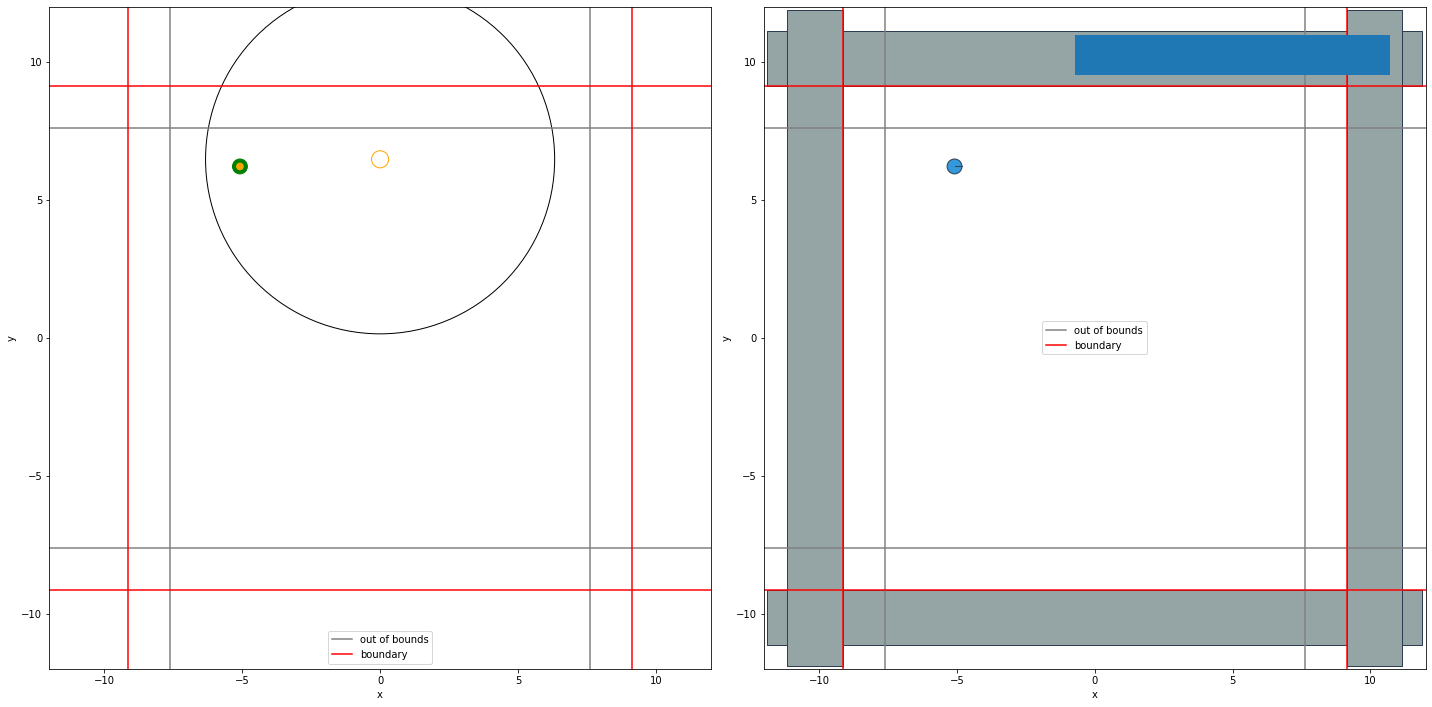

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
env.render(ax=axs[0])
env.render(backend='pymunk', ax=axs[1])
plt.plot([0,10], [10.244,10.244], linewidth=40)
plt.tight_layout()

In [ ]:
pymunk.Segment(

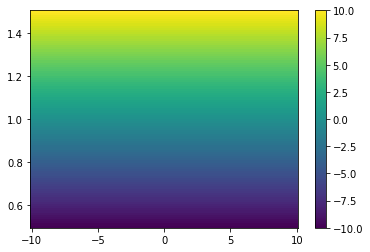

In [15]:
def layup_contest(height_diff, weight_diff):
    return height_diff
    
height_diff = np.linspace(-10, 10, 100)
weight_diff = np.linspace(.5, 1.5, 100)
height_diff_mg, weight_diff_mg = np.meshgrid(height_diff, weight_diff, indexing='ij')

contest = layup_contest(height_diff_mg, weight_diff_mg)

plt.pcolormesh(height_diff, weight_diff, contest)
# plt.xlabel(height_diff[::20])
plt.colorbar()
plt.show()